In [121]:
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from scipy.stats import ttest_1samp
import seaborn as sns


from sklearn import model_selection
from sklearn.model_selection import train_test_split #for splitting the data into testing and training
from sklearn.preprocessing import StandardScaler # this is used to make sure there's no basis for large numbers

from sklearn.metrics import confusion_matrix #for testing
from sklearn.metrics import f1_score #for testing
from sklearn.metrics import accuracy_score #for testing
from sklearn.metrics import classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier

In [2]:
dataset = pd.read_csv('bank-info.csv')
dataset.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41185,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41186,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41187,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Checking for null values:

In [3]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### No null values were discoverd 

# Check skewness/Outliers
## created a sub dataframe to only check columns with numberic values

In [4]:
subsetData = dataset[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']]
subsetData.head()
subsetData.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
from scipy.stats import skew
import seaborn as sns

age
0.7846682380932293


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


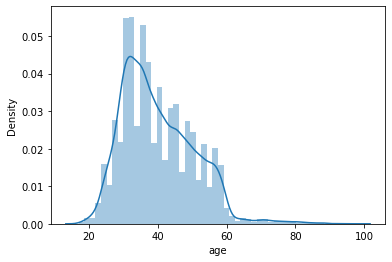

duration
3.2630224157610432


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


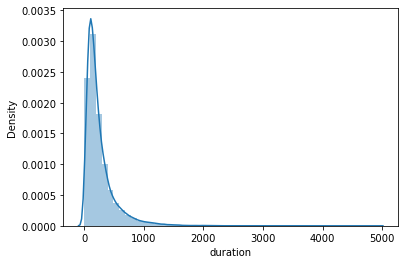

campaign
4.762333252560967


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


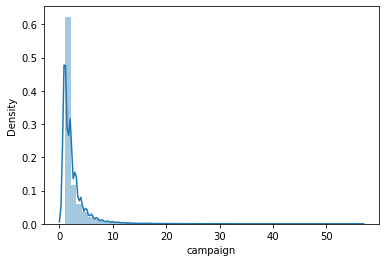

pdays
-4.922010656450046


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


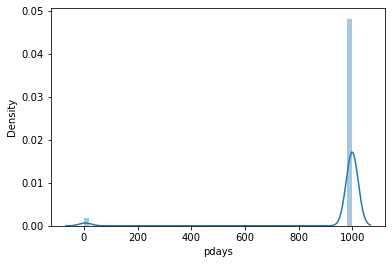

previous
3.8319026847007036


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


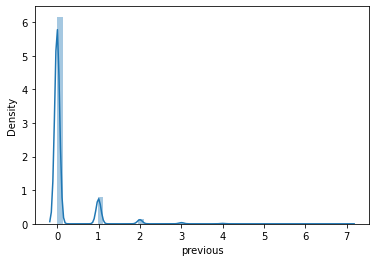

emp.var.rate
-0.7240691785977531


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


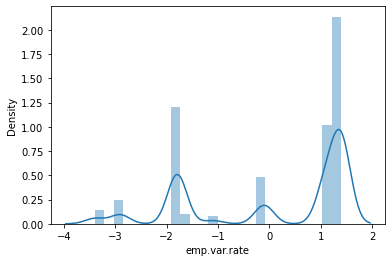

cons.price.idx
-0.23087924271991106


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


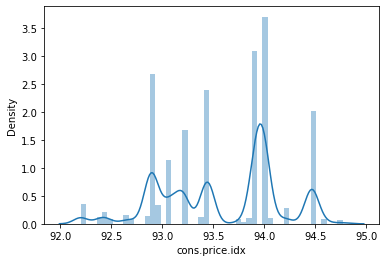

cons.conf.idx
0.30316881731892303


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


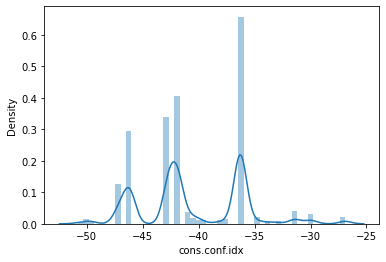

euribor3m
-0.7091621286441164


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


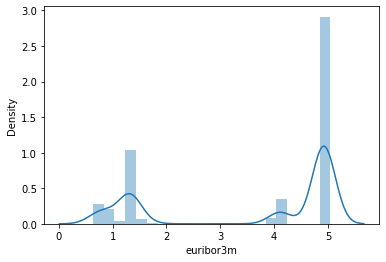

nr.employed
-1.0442243763652301


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


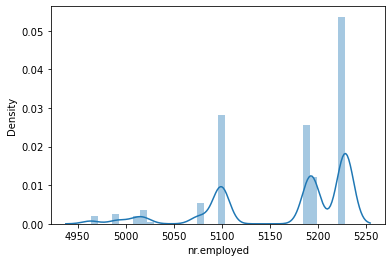

In [6]:
for col in subsetData:
    print(col)
    print(skew(subsetData[col]))
    
    
    plt.figure()
    
    sns.distplot(subsetData[col])
    plt.show()
    

# Dealing with the skewness

In [7]:
sqrAge = np.sqrt(subsetData['age'])

In [8]:
skew(sqrAge)

0.440619036249743

C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


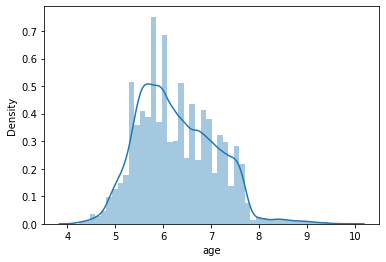

In [9]:
plt.figure()
    
sns.distplot(sqrAge)
plt.show()

In [10]:
sqrAge.mean()

6.275060340376933

In [11]:
sqrAge.median()

6.164414002968976

In [12]:
# The mean and the median are almost equal, thus we now have symmetrical distribution and no more skewness in Age
# Will do that with the rest of the columns

In [13]:
sqrduration = np.sqrt(subsetData['duration'])

In [14]:
skew(sqrduration)

1.1995245640956793

C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


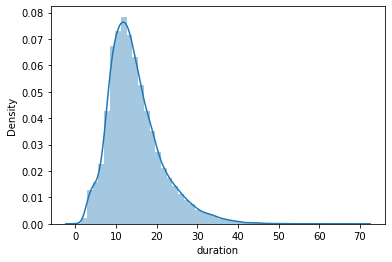

In [15]:
plt.figure()
    
sns.distplot(sqrduration)
plt.show()

In [16]:
sqrcampaign = np.sqrt(subsetData['campaign'])
skew(sqrcampaign)

2.1685028501394124

C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


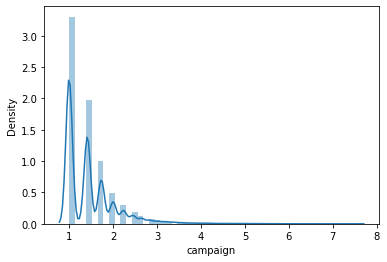

In [17]:
plt.figure()
    
sns.distplot(sqrcampaign)
plt.show()

In [18]:
sqrdays = np.sqrt(subsetData['pdays'])
skew(sqrdays)

-4.927171203655262

C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


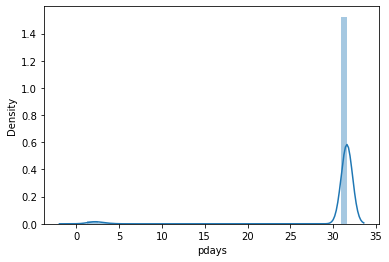

In [19]:
plt.figure()
    
sns.distplot(sqrdays)
plt.show()

In [20]:
sqrprevious = np.sqrt(subsetData['previous'])
skew(sqrprevious)

2.3886653743053796

C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


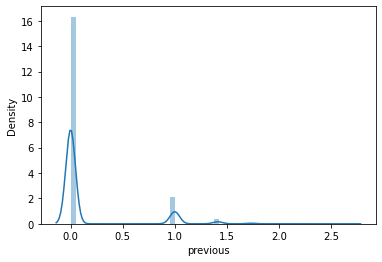

In [21]:
plt.figure()
    
sns.distplot(sqrprevious)
plt.show()

In [22]:
# Create a new data frame with the improved data:

In [23]:
subsetData.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [24]:
improvedData= pd.concat([sqrAge, sqrcampaign, sqrdays, sqrduration, sqrprevious], axis=1)
improvedData.head()

,age,campaign,pdays,duration,previous
0,5.656854,7.483315,31.606961,16.155494,0.0
1,5.656854,6.557439,31.606961,4.000000,0.0
2,7.348469,6.557439,31.606961,8.062258,0.0
3,5.385165,6.480741,31.606961,11.135529,0.0
4,6.633250,6.480741,31.606961,12.124356,0.0


In [25]:
improvedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       41188 non-null  float64
 1   campaign  41188 non-null  float64
 2   pdays     41188 non-null  float64
 3   duration  41188 non-null  float64
 4   previous  41188 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


In [26]:
dataset['age']= improvedData['age']

In [27]:
dataset['campaign']= improvedData['campaign']
dataset['duration']= improvedData['duration']

In [28]:
dataset['pdays']= improvedData['pdays']

In [29]:
dataset['previous']= improvedData['previous']

In [30]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,5.656854,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,16.155494,7.483315,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
1,5.656854,technician,single,university.degree,no,yes,yes,telephone,jul,wed,4.000000,6.557439,31.606961,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
2,7.348469,admin.,married,university.degree,unknown,yes,no,cellular,jul,thu,8.062258,6.557439,31.606961,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
3,5.385165,technician,married,professional.course,no,yes,no,telephone,may,mon,11.135529,6.480741,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
4,6.633250,retired,married,basic.9y,no,yes,no,telephone,may,fri,12.124356,6.480741,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Now that we've removed the skewness, it's good practice to remove unknown data for the analysis

In [31]:
# The number of 'unknown' data in each column:

In [32]:
(dataset['job'] == 'unknown').sum()

330

In [33]:
(dataset['marital'] == 'unknown').sum()

80

In [34]:
(dataset['education'] == 'unknown').sum()

1731

In [35]:
(dataset['default'] == 'unknown').sum()

8597

In [36]:
(dataset['housing'] == 'unknown').sum()

990

In [37]:
(dataset['loan'] == 'unknown').sum()

990

In [38]:
# removal of unknowns values function
def removal_unknowns(dataset, column):
    col_values = dataset[column].values
    dataset[column] = np.where(col_values=='unknown', dataset[column].mode(), col_values)
    return dataset

In [39]:
newData = removal_unknowns(dataset=dataset, column='job')
newData.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
18895,6.782330,technician,married,professional.course,no,no,no,cellular,aug,thu,9.000000,1.414214,31.606961,0.0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no
24664,7.549834,retired,married,university.degree,no,yes,no,telephone,may,tue,27.712813,1.000000,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
7974,5.830952,blue-collar,single,basic.4y,no,yes,yes,telephone,may,tue,33.060551,1.732051,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
39325,5.291503,technician,single,professional.course,no,yes,no,cellular,aug,thu,8.000000,1.000000,31.606961,0.0,nonexistent,-2.9,92.201,-31.4,0.851,5076.2,no
28260,6.082763,technician,married,basic.9y,no,yes,no,telephone,jul,thu,31.480152,1.000000,31.606961,0.0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no


In [40]:
newData = removal_unknowns(dataset=dataset, column='marital')
newData.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1174,5.291503,student,single,high.school,unknown,no,no,telephone,jun,tue,16.000000,3.000000,31.606961,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
26937,7.211103,retired,married,basic.4y,no,no,no,telephone,jun,wed,25.159491,1.000000,31.606961,0.0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,yes
6521,5.656854,technician,married,high.school,no,yes,no,cellular,aug,wed,11.180340,2.000000,31.606961,0.0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
15308,6.164414,blue-collar,married,basic.6y,no,no,no,telephone,jun,mon,12.000000,1.414214,31.606961,0.0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
37113,5.916080,technician,married,professional.course,no,yes,no,cellular,may,mon,9.486833,1.000000,31.606961,1.0,failure,-1.8,92.893,-46.2,1.299,5099.1,no


In [41]:
newData = removal_unknowns(dataset=dataset, column='education')
newData.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
15252,6.324555,management,married,university.degree,no,unknown,unknown,telephone,jun,mon,7.810250,1.414214,31.606961,0.0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
17427,6.928203,technician,divorced,professional.course,no,no,no,cellular,jul,wed,11.269428,1.414214,31.606961,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
40922,8.062258,technician,married,professional.course,no,no,no,cellular,sep,thu,16.217275,1.000000,31.606961,0.0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
36032,6.855655,services,married,high.school,unknown,yes,no,cellular,may,tue,19.416488,1.000000,31.606961,1.0,failure,-1.8,92.893,-46.2,1.344,5099.1,no
2223,5.656854,entrepreneur,married,basic.4y,no,yes,no,cellular,nov,wed,23.388031,2.645751,31.606961,0.0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [42]:
newData = removal_unknowns(dataset=dataset, column='default')
newData.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37733,5.830952,admin.,married,high.school,no,no,no,cellular,may,thu,19.026298,1.000000,31.606961,1.000000,failure,-1.8,92.893,-46.2,1.266,5099.1,no
21058,6.480741,services,married,professional.course,no,yes,no,cellular,may,thu,10.148892,1.414214,31.606961,1.000000,failure,-1.8,92.893,-46.2,1.327,5099.1,no
39703,6.000000,admin.,married,university.degree,no,no,no,cellular,oct,fri,18.493242,1.000000,31.606961,1.414214,failure,-3.4,92.431,-26.9,0.739,5017.5,yes
34669,4.582576,student,single,high.school,no,no,no,cellular,mar,tue,14.832397,1.000000,31.606961,0.000000,nonexistent,-1.8,92.843,-50.0,1.614,5099.1,yes
1521,7.211103,blue-collar,divorced,university.degree,no,no,no,cellular,jul,tue,10.535654,2.828427,31.606961,0.000000,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


In [43]:
newData = removal_unknowns(dataset=dataset, column='housing')
newData.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3513,7.000000,admin.,married,university.degree,no,no,no,telephone,may,tue,8.485281,2.236068,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
4342,5.916080,management,married,university.degree,no,no,yes,cellular,aug,fri,29.546573,2.236068,31.606961,0.0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,yes
19091,6.082763,entrepreneur,married,university.degree,no,yes,no,cellular,nov,mon,12.288206,1.414214,31.606961,1.0,failure,-0.1,93.200,-42.0,4.191,5195.8,no
20702,7.745967,admin.,married,high.school,no,yes,yes,cellular,apr,thu,21.954498,1.414214,31.606961,0.0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,yes
11802,6.244998,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,19.442222,1.732051,31.606961,0.0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,no


In [44]:
newData = removal_unknowns(dataset=dataset, column='loan')
newData.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21246,6.855655,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,12.083046,1.414214,31.606961,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
2234,6.000000,blue-collar,single,basic.6y,no,no,no,cellular,nov,thu,14.798649,2.645751,31.606961,1.0,failure,-0.1,93.200,-42.0,4.076,5195.8,no
35330,6.855655,management,married,high.school,no,yes,no,cellular,apr,fri,15.297059,1.000000,31.606961,1.0,failure,-1.8,93.075,-47.1,1.405,5099.1,no
6507,7.000000,admin.,married,high.school,no,yes,yes,cellular,aug,tue,10.954451,2.000000,31.606961,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
33111,5.830952,admin.,married,high.school,no,no,no,cellular,nov,mon,10.630146,1.000000,31.606961,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [45]:
(dataset['marital'] == 'unknown').sum()

0

In [46]:
(dataset['education'] == 'unknown').sum()

0

In [47]:
(dataset['default'] == 'unknown').sum()

0

In [48]:
(dataset['housing'] == 'unknown').sum()

0

In [49]:
(dataset['loan'] == 'unknown').sum()

0

In [50]:
# Changing the column names to make them easier to read

In [51]:
mapping = {dataset.columns[15]:'employment_variation_rate', dataset.columns[16]: 'consumer_price_index', 
           dataset.columns[17]:'consumer_confidence_index', dataset.columns[19]: 'number_of_employees',
           dataset.columns[20]: 'subscribed' }
dataset = dataset.rename(columns=mapping)

In [52]:
dataset.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor3m,number_of_employees,subscribed
31236,5.744563,technician,married,high.school,no,no,no,cellular,aug,fri,10.392305,1.000000,31.606961,0.000000,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
38264,6.244998,technician,single,university.degree,no,yes,no,cellular,may,fri,12.247449,1.000000,31.606961,0.000000,nonexistent,-1.8,92.893,-46.2,1.259,5099.1,no
18003,6.633250,technician,divorced,professional.course,no,yes,no,cellular,aug,thu,20.493902,1.414214,31.606961,0.000000,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
15045,5.567764,admin.,married,high.school,no,yes,no,telephone,may,thu,14.106736,1.414214,31.606961,0.000000,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
24300,6.082763,admin.,married,high.school,no,yes,no,telephone,may,fri,9.848858,1.000000,31.606961,0.000000,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
20999,5.567764,blue-collar,single,high.school,no,yes,no,cellular,may,wed,10.770330,1.414214,31.606961,1.414214,failure,-1.8,92.893,-46.2,1.334,5099.1,no
39461,6.708204,admin.,married,university.degree,no,no,no,cellular,sep,mon,18.734994,1.000000,1.732051,1.414214,success,-3.4,92.379,-29.8,0.797,5017.5,yes
10229,6.082763,services,divorced,high.school,no,no,no,cellular,jul,thu,9.899495,1.732051,31.606961,0.000000,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
31873,5.567764,technician,married,professional.course,no,yes,no,cellular,aug,tue,16.852300,1.000000,31.606961,0.000000,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
73,5.196152,services,single,high.school,no,yes,yes,telephone,jun,fri,5.000000,5.099020,31.606961,0.000000,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no


# Now that our data is clean and go to go, we will start the analysis

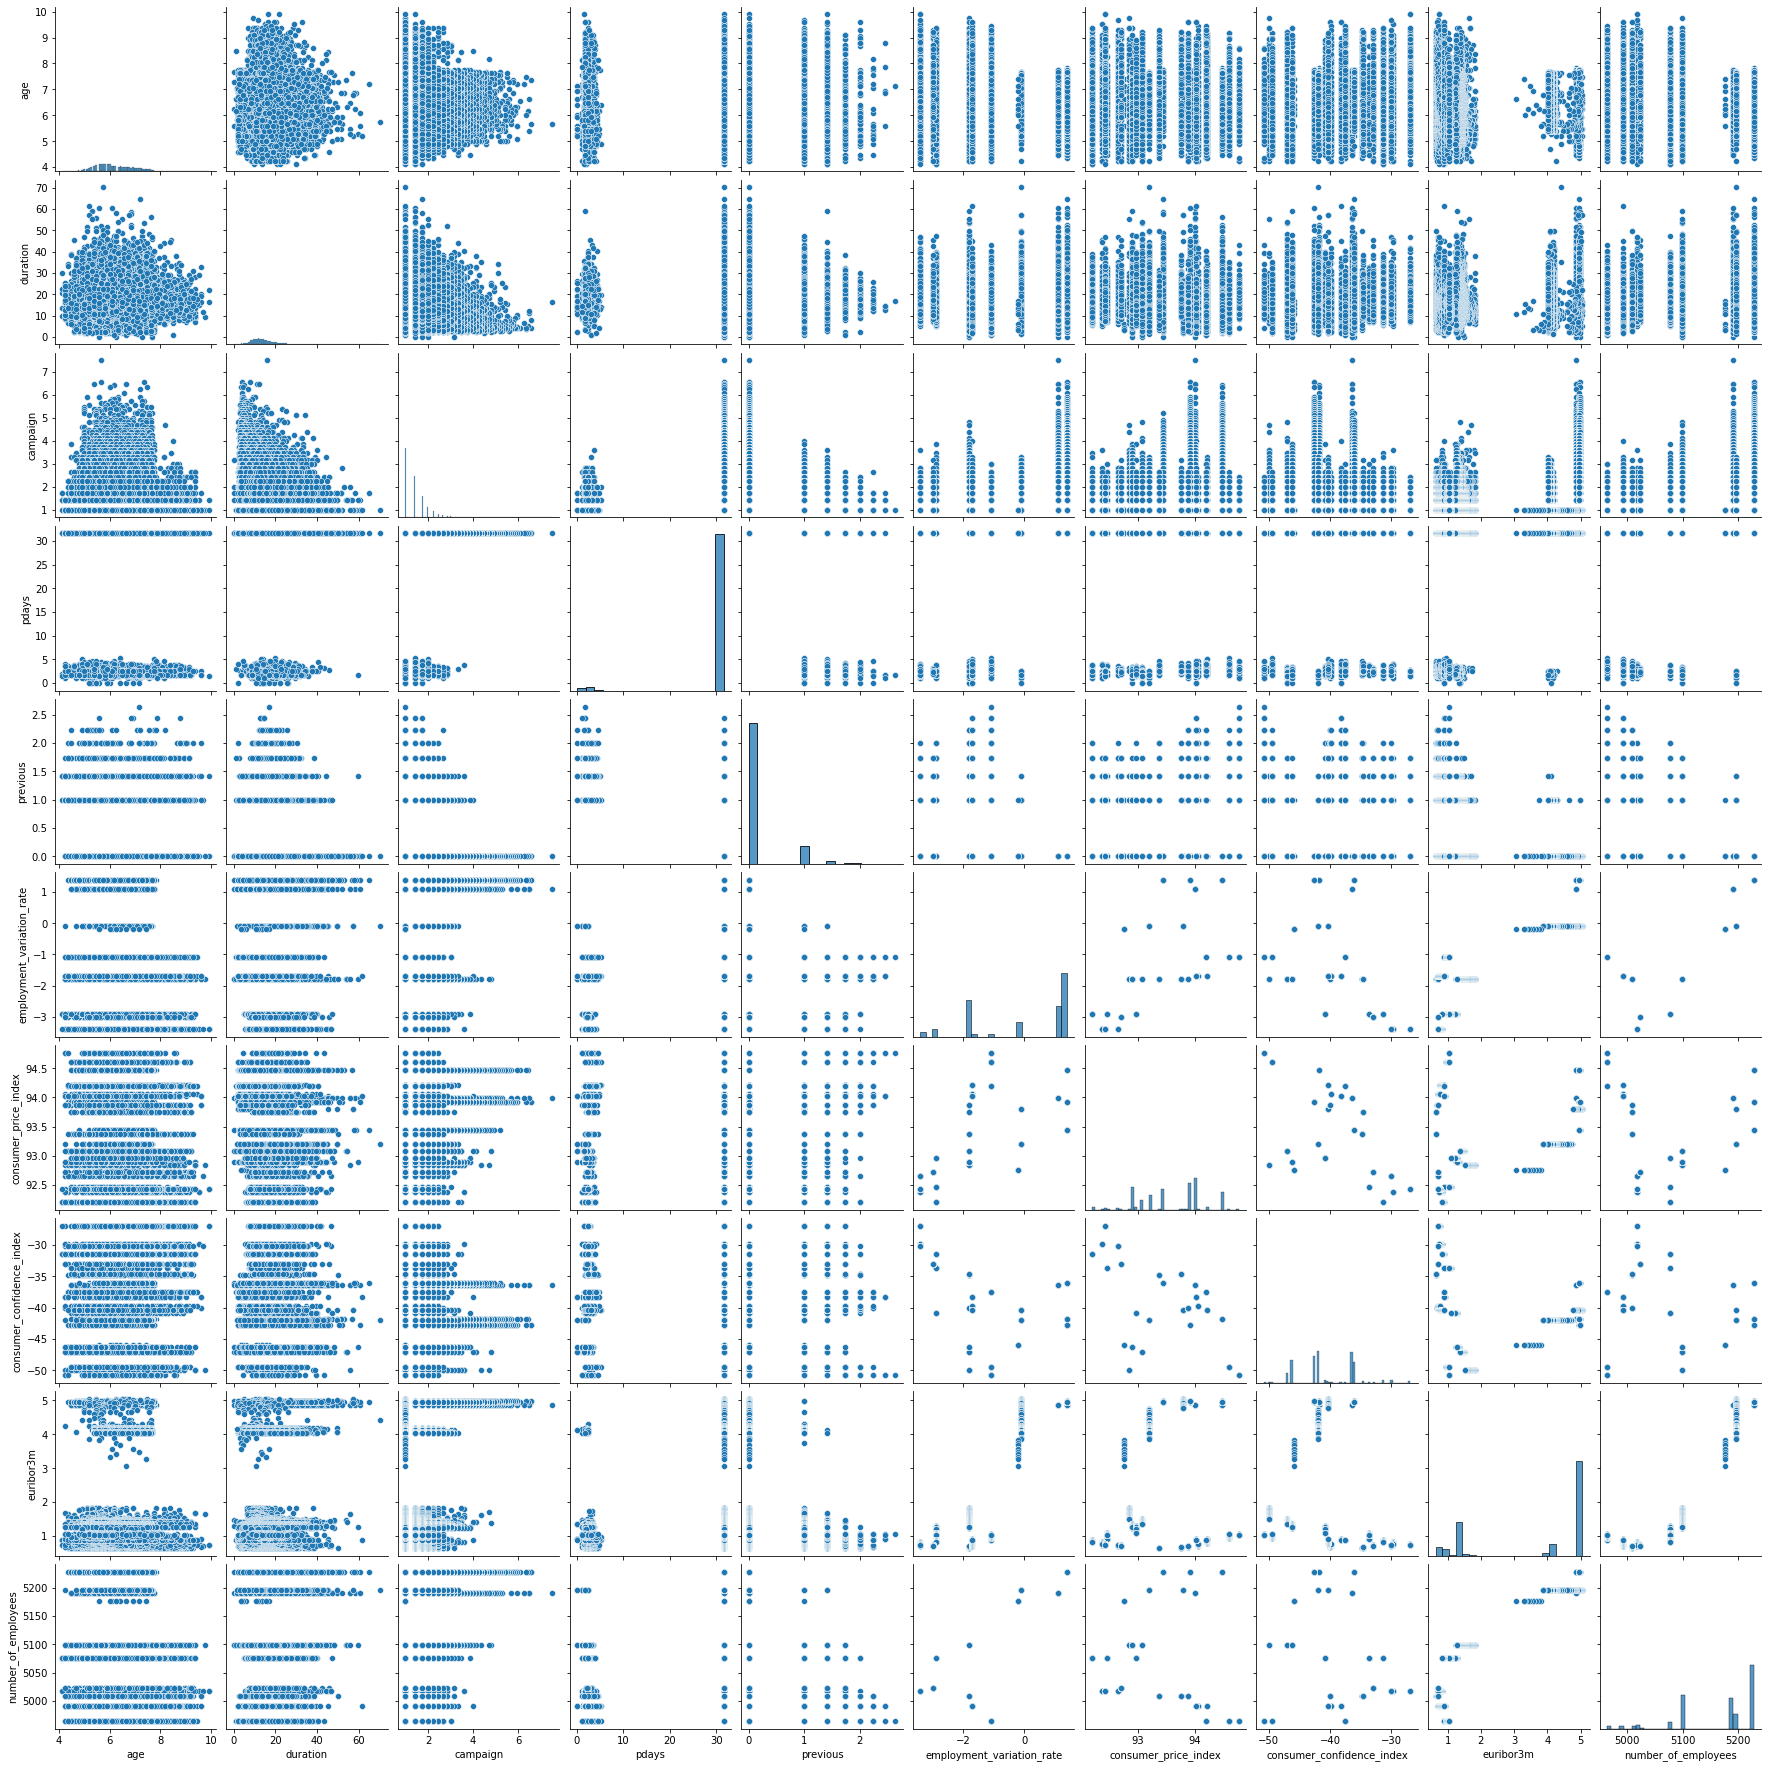

In [53]:
sns.pairplot(dataset)

<AxesSubplot:xlabel='job', ylabel='education'>

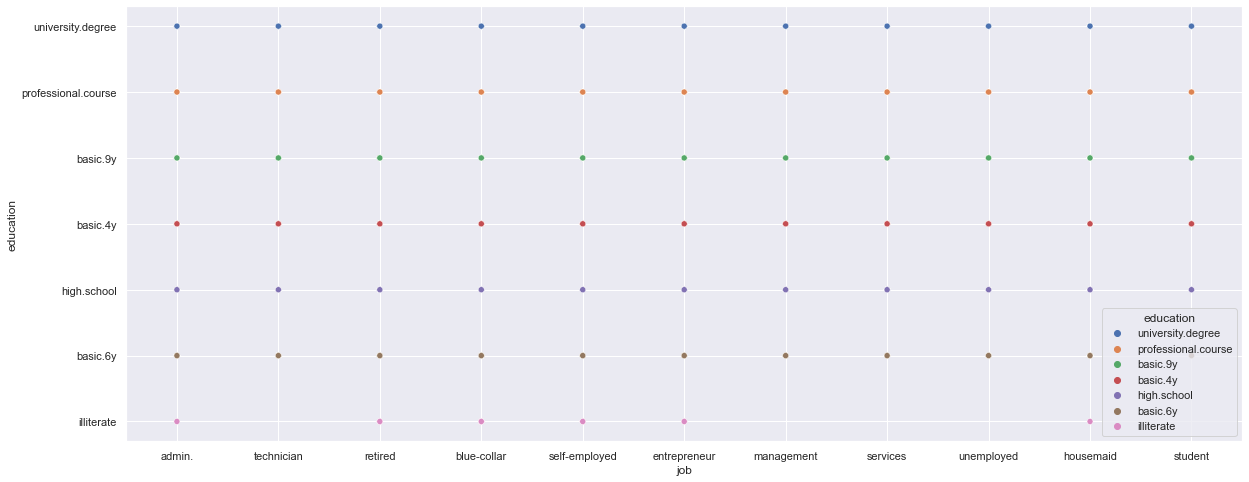

In [54]:
sns.set(rc={'figure.figsize':(20,8)})
sns.scatterplot(x='job', y='education', data=dataset, hue='education')

<AxesSubplot:>

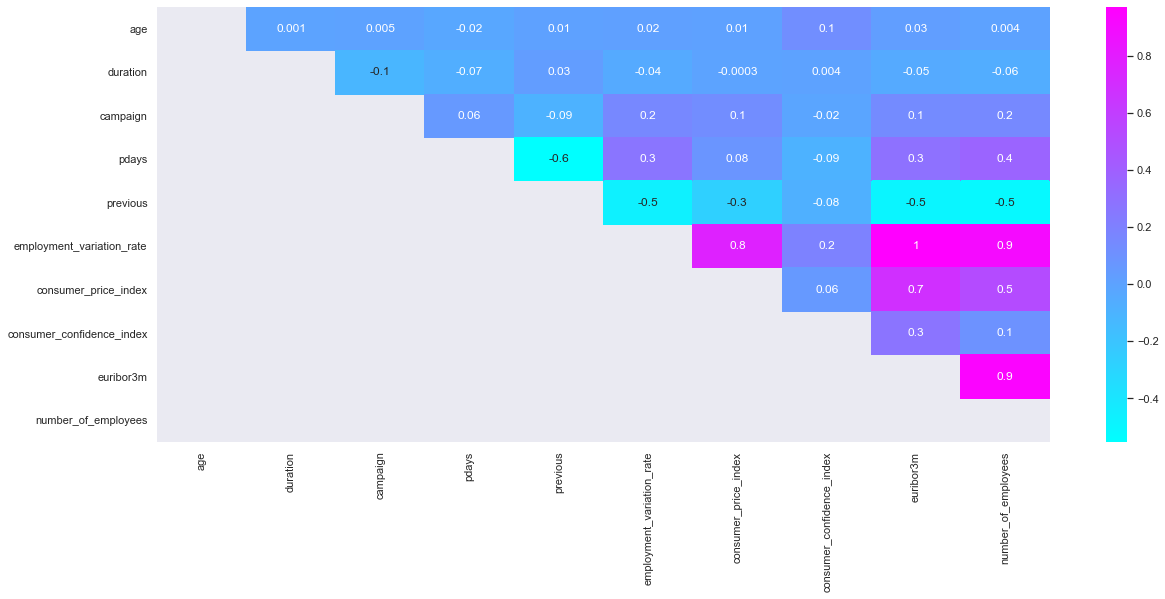

In [55]:
mask = np.tril(dataset.corr())
sns.heatmap(dataset.corr(), fmt='.1g', annot = True, cmap= 'cool', mask=mask)

# KNN Algorithm

#### (Model for Ensemble) 

#### Changing the values into numbers to fit them into an algorithm

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41188 non-null  float64
 1   job                        41188 non-null  object 
 2   marital                    41188 non-null  object 
 3   education                  41188 non-null  object 
 4   default                    41188 non-null  object 
 5   housing                    41188 non-null  object 
 6   loan                       41188 non-null  object 
 7   contact                    41188 non-null  object 
 8   month                      41188 non-null  object 
 9   day_of_week                41188 non-null  object 
 10  duration                   41188 non-null  float64
 11  campaign                   41188 non-null  float64
 12  pdays                      41188 non-null  float64
 13  previous                   41188 non-null  flo

In [78]:
#split the data:
X = dataset.iloc[:, 0:15] # selecting from col 0 to 14
y = dataset.iloc[:, 20] # Selecting only the last column, the outcome of the data (yes or no)


In [79]:
#The get_dummies converts categorical data into dummy or indicator variables (0 or 1)
X_dummy = pd.get_dummies(X)
X_dummy.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,5.656854,16.155494,7.483315,31.606961,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,5.656854,4.000000,6.557439,31.606961,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,7.348469,8.062258,6.557439,31.606961,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,5.385165,11.135529,6.480741,31.606961,0.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,6.633250,12.124356,6.480741,31.606961,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [83]:
#converting into numpy Array
X = X_dummy.values
Y = y.values

# Split-out validation dataset
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_train = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [86]:
import math
math.sqrt(len(y_test)) # Since we're gonna use KNN to decide how to classify, we don't want EVEN numbers bc that would be like a tie in voting

90.76342875850384

In [87]:
# we subtracted 1 from the above number (90-1= 89) and used that as our n_neighbors, bc odd numbers are the way to go when comes to "voting"
#p=2 bc we want to check if they subscribed or not, so 2 options
#euclidean is the most common meteric
classifer = KNeighborsClassifier(n_neighbors=89, p=2, metric='euclidean') 

In [88]:
classifer.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=89)

In [89]:
y_pred = classifer.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [107]:
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[7286    0]
 [ 952    0]]


In [91]:
# 7286 true positives, 0 false postives 
# 952 false negative, 0 true negatives

In [105]:
print(accuracy_score(y_test, y_pred))

0.8844379703811605


#### We were able to predict with 88% accuracy whether or not someone would subscribe to the bank's prodcut using KNN algorithm 

# Logistic Regression

### Linear model

In [108]:
modelLR= LogisticRegression()

In [109]:
modelLR.fit(X_train, y_train)

C:\Users\HP\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
LRPrediction = modelLR.predict(X_test)
LRPrediction

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [116]:
LRcm= confusion_matrix(y_test, LRPrediction)
print(LRcm)

[[7286    0]
 [ 952    0]]


In [117]:
print(accuracy_score(y_test, LRPrediction))

0.8844379703811605


#### The accuracy score is the same with KNN and LR

# Boosting Preformance

#### Boosting the preformance of LR using Ada Boost algorithm

In [137]:
adabc= AdaBoostClassifier(n_estimators=150, base_estimator= modelLR, learning_rate=1)

In [140]:
BoostedModel= adabc.fit(X_train, y_train)
BoostedPrediction= BoostedModel.predict(X_train)

In [147]:
print(accuracy_score(y_train, BoostedPrediction))

0.8880728376327769


In [148]:
# Theres less than 0.01 improvment